# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.stats.weightstats import ztest

df = pd.read_csv('data/human_body_temperature.csv')

### First I'll do some EDA of the dataframe from the imported data.

In [2]:
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


### 1. Is the distribution of body temperatures normal?  
   * First start out with graphical EDA.
   * Then move into the Normality Test. 

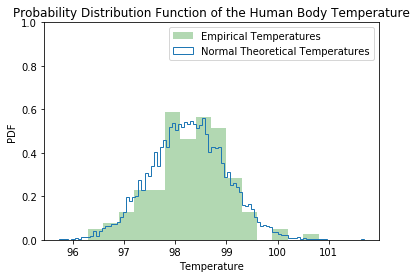

In [3]:
#Look at a histogram of the data against what the theoretical normal distribution would like.
df.temperature.plot(kind='hist',color='green', normed=True, alpha=0.3, bins=15)

#Creating the theoretical normal distribution of the data.
normal_samples = np.random.normal(df.temperature.mean(),df.temperature.std(),size=10000)
plt.hist(normal_samples, histtype='step', bins=100, normed=True)

plt.yticks(np.arange(0,1.2,0.2))
plt.title('Probability Distribution Function of the Human Body Temperature')
plt.xlabel('Temperature')
plt.ylabel('PDF')
plt.legend(('Empirical Temperatures','Normal Theoretical Temperatures'))
plt.show()

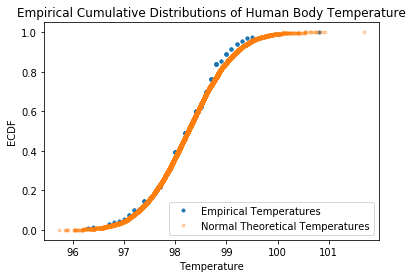

In [4]:
#Now look into the empirical cumulative distribution vs. the theoretical for normal data.
y = ECDF(df.temperature)
y_theor = ECDF(normal_samples)

plt.plot(df.temperature,y(df.temperature),marker='.',linestyle='None')
plt.plot(normal_samples,y_theor(normal_samples),marker='.',linestyle='None',alpha=0.3)

plt.title('Empirical Cumulative Distributions of Human Body Temperature')
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.legend(('Empirical Temperatures','Normal Theoretical Temperatures'))
plt.show()

### After looking at the distributions, it seems that the data is fairly normal.  To be more quantitative, I will run some Normality Tests.

In [5]:
#run the stats normal test and stats shapiro test
statistic, pvalue = stats.mstats.normaltest(df.temperature)
print("The D’Agostino and Pearson’s test statistic is {} and the pvalue of the test is {}.".format(statistic, pvalue))
statistic, pvalue = stats.shapiro(df.temperature)
print("The Shapiro and Wilk test statistic is {} and the pvalue of the test is {}.".format(statistic, pvalue))

The D’Agostino and Pearson’s test statistic is 2.703801433319203 and the pvalue of the test is 0.2587479863488254.
The Shapiro and Wilk test statistic is 0.9865769743919373 and the pvalue of the test is 0.2331680953502655.


### The Normality tests used here both test the null hypothesis that the data comes from a normal distribution.  The fact that both tests have pvalues greater than 0.2 means that we can't reject the null hypothesis.  Moreover, it is most likely not too big of an error to treat the temperature data as if it is distributed normally.

***

### 2. Is the sample size large? Are the observations independent?
* The sample size is large especially concerning running z tests (n>30).
* The background of the data snippet seems to be collected in an independent manner.  Having not taking the data myself, I cannot discuss more on the topic.
    
***

### 3. Is the true population mean really 98.6 degrees F?
* First, try a bootstrap hypothesis test.
* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  tt  or  zz  statistic?
* Now try using the other test. How is the result be different? Why?
    
***

#### Bootstrap Hypothesis Test
* The null hypothesis is that the true mean human body temperature is 98.6.  
* In order to test I will shift the data as if it had a mean of 98.6.
* I will then generate 10000 bootstrap samples from the shifted data.
* The test statistic is going to be the mean of the bootstrap sample minus 98.6.
* The p value will be calculated as the number of bootstrap samples that have a test statistic value at least as extreme as the calculated empirical test statistic value of the real data mean minus 98.6.

In [6]:
#first get the empirical test statistic and create the test statistic function
def mean_diff(data):
    return np.mean(data)-98.6

emp = mean_diff(df.temperature)
print("The empirical difference of the data mean from 98.6 degrees F is {}.".format(emp))

#shift the data to have the mean 98.6
shifted_temp = df.temperature - np.mean(df.temperature) + 98.6

#create the bootstrap replicates function
def bs_replicates(data,func,size):
    bs_reps = np.empty(size)
    for i in range(size):
        bs_temp = np.random.choice(data, size=len(data))
        bs_reps[i] = func(bs_temp)
    return bs_reps

#now create a distribution of bootstrap replicates
reps = bs_replicates(shifted_temp,mean_diff,1000000)
p_val = np.sum(reps <= emp)/reps.size
print("The p-value is: {}".format(p_val))

The empirical difference of the data mean from 98.6 degrees F is -0.35076923076921673.
The p-value is: 0.0


#### The resulting p value from 1 million bootstrap samples is 0.0, which suggests that the result is statistically significant and I can reject the null hypothesis that the mean of the temperature data is 98.6 degrees F.

***

#### Z-test
* The test needed is a one sample test as we only have one dataset sample.  So we have one sample set of data that we are comparing to a mean without data.  In this case, it is appropriate to use the z test statistic.  This is because the dataset is large (n > 30) and the data can be assumed to be normally distributed as shown above.  Moreover, for the z test to be valid we need to assume that the variance of the population is the variance of the sample set.

In [7]:
#z test for data having a mean of 98.6
z_score, p_val = ztest(df.temperature,value=98.6)
print("The z_score is {}, and the p-value is {}.".format(z_score,p_val))

The z_score is -5.4548232923645195, and the p-value is 4.9021570141012155e-08.


#### T-test
* If we try the t-test, the result is basically similar to the t statistic because it should approach the z statistic in large sample size scenarios.  Also, in large sample scenarios the t distribution approaches the normal distribution assumed in the z test.

In [8]:
#t-test for mean of 98.6
t_stat, p_val = stats.ttest_1samp(df.temperature,popmean=98.6)
print("The t score is {}, and the p-value is {}.".format(t_stat,p_val))

The t score is -5.4548232923645195, and the p-value is 2.4106320415561276e-07.


#### Both z and t tests gave similar scores and p value, which both agree with the bootstrap analysis results that the test results are statistically significant, and we can reject the null hypothesis that the mean is 98.6 degrees F.

***

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

***

* The correct test to use is the t test in this case as the sample size is small (n < 30) and the data will most likely not be normally distributed.  Moreover, it is illogical to assume that the population variance can be estimated from the sample variance.

In [9]:
#t-test and z-test with a sample size of 10
samp_10 = np.random.choice(df.temperature, size=10)

#z test for data having a mean of 98.6
z_score, p_val = ztest(samp_10,value=98.6)
print("The z_score is {}, and the p-value is {}.".format(z_score,p_val))

#t-test for mean of 98.6
t_stat, p_val = stats.ttest_1samp(samp_10,popmean=98.6)
print("The t score is {}, and the p-value is {}.".format(t_stat,p_val))


The z_score is -0.9158393362252509, and the p-value is 0.3597511684557182.
The t score is -0.9158393362252508, and the p-value is 0.383634128555977.


* After running both tests, both results are no longer statistically significant suggesting that we can't reject the null hypothesis and the mean temperature may be 98.6 degrees F.  This suggests that part of statistical power relies on sample size.

***

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [22]:
#margin of error and the confidence interval from the bootstrap method results above
def margin_of_error_95(data):
    return (2 * (np.std(data)/np.sqrt(data.size)))

#bootstrap margin of error and 95% confidence interval of the mean
moe = np.mean(bs_replicates(df.temperature, margin_of_error_95, 10000))
print("The bootstrap margin of error is {}.".format(moe))
print("The bootstrap 95% confidence interval for the mean temperature is {} to {}."
      .format(np.mean(df.temperature)-moe,np.mean(df.temperature)+moe))

#now to calculate the margin of error and 95% confidence interval with frequentist approach
sem = stats.sem(df.temperature)
freq_moe = 2*sem
print("The frequentist margin of error is {}.".format(freq_moe))
print("The frequentist 95% confidence interval for the mean temperature is {} to {}."
      .format(df.temperature.mean()-freq_moe,df.temperature.mean()+freq_moe))

The bootstrap margin of error is 0.12733754935737285.
The bootstrap 95% confidence interval for the mean temperature is 98.1218932198734 to 98.37656831858816.
The frequentist margin of error is 0.12860883367578205.
The frequentist 95% confidence interval for the mean temperature is 98.120621935555 to 98.37783960290656.


* The bootstrap and frequentist approach produce very similar margins of error and thus 95% confidence intervals of the sample mean.

In [26]:
#bootstraps of percentiles for 95 percentile range for the dataset
def per_97th(data):
    return np.percentile(data,97.5)
def per_2nd(data):
    return np.percentile(data,2.5)
per_97 = np.mean(bs_replicates(df.temperature,per_97th,10000))
per_2 = np.mean(bs_replicates(df.temperature,per_2nd,10000))
print("The normal 95th percentile range for the body temperature is {} to {}.".format(per_2,per_97))

The normal 95th percentile range for the body temperature is 96.76999 to 99.578699.


* Being that the body temperatures are distributed normally, I will take abnormal temperatures to be 2 standard deviations from the sample mean or roughly where 95% of the data lies.  I will use the bootstrap method to generate an average 95th percentile data range to define the normal body temperature range.  Anything outside of this range will be abnormal body temperatures.  This is the best that can be done without more data and labeled cases of body temperatures when people were sick and not sick.

***

### 6. Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.


* First, do some EDA on the different sexes.

In [27]:
#Look at summary stats by gender.
female = df[df.gender=='F']
male = df[df.gender=='M']
print('Female')
print(female.describe())
print('')
print('Male')
print(male.describe())

Female
       temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000

Male
       temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000


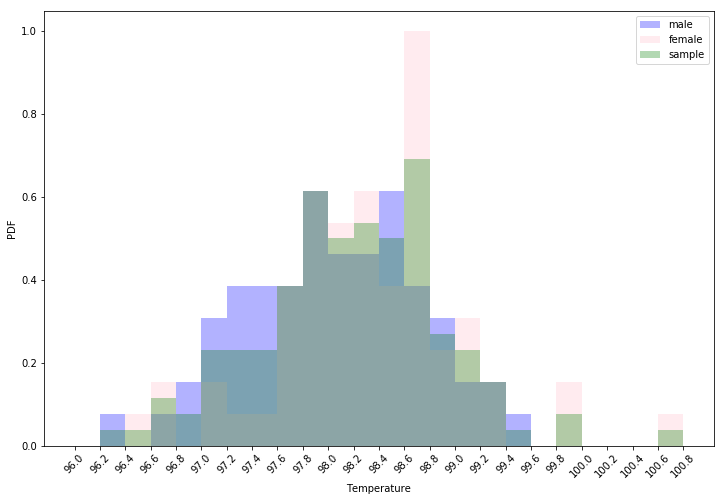

In [35]:
#Now do some visual EDA by looking at the histograms of both male, female, and entire sample
plt.figure(figsize=(12,8))
male.temperature.plot(kind='hist',color='blue', normed=True, alpha=0.3, bins=np.arange(96,101,.2))
female.temperature.plot(kind='hist',color='pink', normed=True, alpha=0.3, bins=np.arange(96,101,.2))
df.temperature.plot(kind='hist',color='green', normed=True, alpha=0.3, bins=np.arange(96,101,.2))
plt.yticks(np.arange(0,1.2,0.2))
plt.xticks(np.arange(96,101,.2),rotation=45)
plt.ylabel('PDF')
plt.xlabel('Temperature')
plt.legend(['male','female','sample'],loc='upper right')
plt.show()

* At first glance, it seems there may be a slight difference between male and females.  
* I will test this further by testing a hypothesis.
    * The null hypothesis is that the there isn't a difference in means between male and female body temperatures.
    * In order to test I will shift both datasets as if they had the same shared mean.
    * I will then generate 10000 bootstrap samples each from the male and female shifted data.
    * The test statistic is going to be the difference of means between male and female body temperatures.
    * The p value will be calculated as the number of bootstrap samples that have a test statistic value at least as extreme as the calculated empirical test statistic value of the difference between means.

In [40]:
#the empirical difference between means and the new calculated shared mean(mean of all the data)
emp_mvf = np.mean(male.temperature) - np.mean(female.temperature)
shared_mean = np.mean(df.temperature)
print("The empirical difference of means is {}.".format(emp_mvf))
print("The shared mean is {}.".format(shared_mean))

#shift both male and female data by the shared mean
shift_f = female.temperature - np.mean(female.temperature) + shared_mean
shift_m = male.temperature - np.mean(male.temperature) + shared_mean

#generate bootstrap samples of shifted mean data
fem_means_reps = bs_replicates(shift_f, np.mean, 10000)
mal_means_reps = bs_replicates(shift_m, np.mean, 10000)

#now generate the bootstrap replicates(test statistics)
diff_reps = mal_means_reps - fem_means_reps

#calculate the p-value for the test
p_val = np.sum(diff_reps <= emp_mvf)/diff_reps.size
print("The p-value for the null hypothesis that the difference between means is 0: {}.".format(p_val))



The empirical difference of means is -0.289230769230727.
The shared mean is 98.24923076923078.
The p-value for the null hypothesis that the difference between means is 0: 0.0108.


* I will now also use a two tailed two sample t test as well.

In [44]:
#two sampled t test
t_score, p_val = stats.ttest_ind(male.temperature, female.temperature)
print("The t score for the two sided t test is {}, and the p-value is {}.".format(t_score,p_val))

The t score for the two sided t test is -2.2854345381656103, and the p-value is 0.02393188312239561.


* The frequentist approach gives similar results suggesting a statistically significant result and possibility to reject the null hypothesis and say that the mean temperature between males and females is possibly different. 


* I chose to test for a difference in means because I believe this is the most indicative test statistic to use for this particular case.  We are interested in a difference in normal temperature between males and females, and the mean difference covers the question.
* With the bootstrap test, we don't assume equal variance of the males and females and this is taken into account by generating the boostrap samples from each sex respectively.
* With the t test, we assumed that the variances were equal and still the result was statistically significant.